In [8]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy: 1.17.2
Matplotlib: 3.1.1
Pandas: 0.25.1
Sklearn: 0.21.3


In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # Support vector classifiers, support vector machine that we will be exploring today
from sklearn import model_selection # so we can do both of them in 1 step
from sklearn.model_selection import cross_validate
from sklearn import preprocessing # Importing classes and function we need to use
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # For data visualisation before actual ml
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape'
        ,'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [11]:
# Preprocess the data
df.replace("?", -9999, inplace=True) #data_frame replace, ? - no data there, tell pythn -9999 to ignore that data
print(df.axes)

df.drop(['id'], 1, inplace=True) # Drop Id column because it's not telling us anything for ml

# Print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [15]:
# Do Dataset Visualisation
print(df.loc[698])
print(df.describe())

clump_thickness            4
univorm_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
signle_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000      

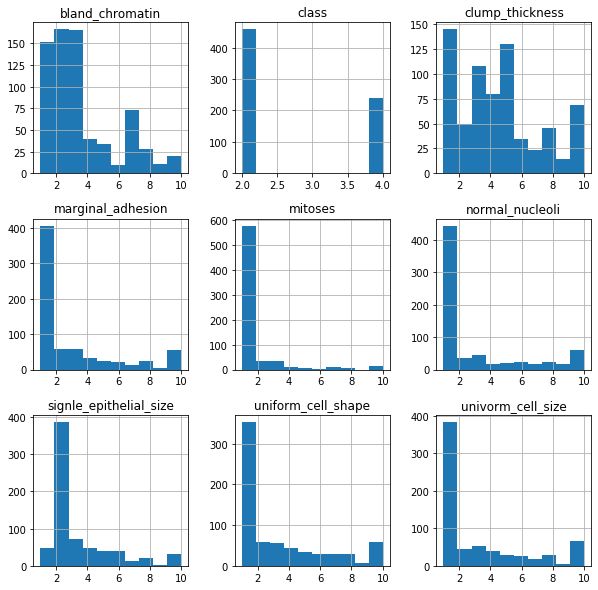

In [16]:
# Plot histogram for each variable
df.hist(figsize = (10,10))
plt.show()

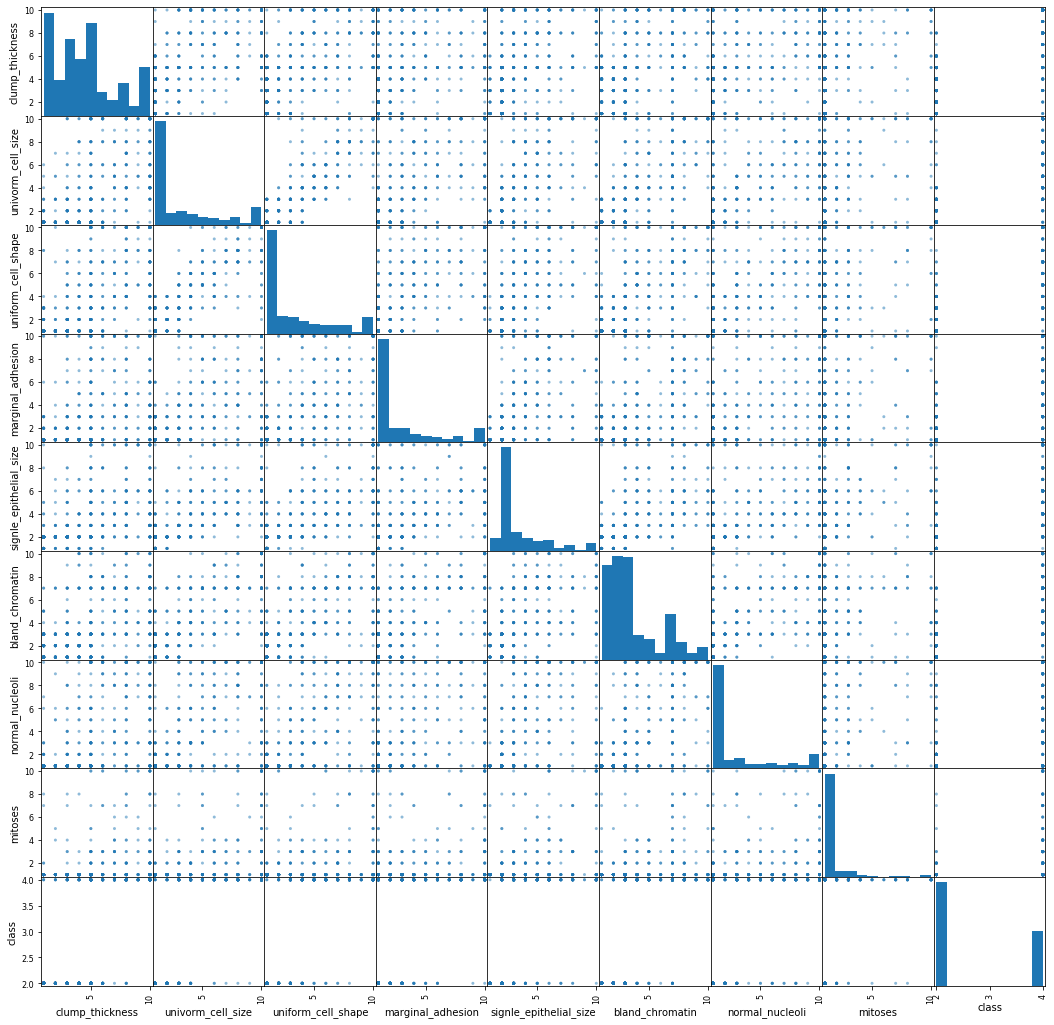

In [18]:
# Create Scatter plot Matrix
scatter_matrix(df, figsize=(18,18))
plt.show()

In [30]:
# Create X and Y dataset for training
X = np.array(df.drop('class',1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Specify testing options
seed = 8 # REPRODUCABLE each other result ... otherwise kclustering algorithm will keep changing the seed
scoring = 'accuracy'

In [32]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma = 'scale'))) # Support vector machine

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)"%(name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.974935 (0.011905)
SVM: 0.647727 (0.049745)


In [33]:
# Make Prediction on validation Dataset
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test, predictions, labels=np.unique(predictions)))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        96
           4       0.93      0.98      0.96        44

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.6857142857142857
              precision    recall  f1-score   support

           2       0.69      1.00      0.81        96

   micro avg       0.69      1.00      0.81        96
   macro avg       0.69      1.00      0.81        96
weighted avg       0.69      1.00      0.81        96



In [36]:
clf = SVC(gamma = 'scale')

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,2,3,2,10,12]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

0.6857142857142857
[2]
